# Unit 4 - Visualize the data
---

1. [Boxplots](#section1)
2. [Histograms](#section2)
3. [Scatterplots](#section3)
4. [Same stats, different graphs](#section4)



Introducing an additional library: [seaborn](https://seaborn.pydata.org/) - for statistical data visualization\
Behind the scenes, seaborn uses matplotlib to draw its plots.\
[matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot) is the GUI manager of the figure. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns  # for creating the graphs

<a id='section1'></a>
## 1. Boxplots 

What are they good for? Let's look at an example with the Titanic dataset

#### Titanic dataset

In [2]:
titanic_df = sns.load_dataset('titanic')

In [ ]:
titanic_df.shape

In [ ]:
titanic_df.head()

#### We would like to vizualize the passengers `age`

##### Attempt #1: With `scatterplot`

The figure size is set using matplotlib, but there are other ways. See [this](https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot) highly voted question on stackoverflow.


In [ ]:
plt.figure(figsize=(4,3))  #figure size
sns.scatterplot(data = titanic_df[['age']])

This is the raw data:

axis x - the 891 passangers 

axis y - the age of each passenger

This is not informative

##### Attempt #2: With `lineplot`

In [ ]:
plt.figure(figsize=(6,3))
g = sns.lineplot(data = titanic_df[['age']])

##### Attempt #3:`boxplot`

In [ ]:
plt.figure(figsize=(2,5))
g = sns.boxplot(data = titanic_df[['age' ]])

We can save the figure using [savefig](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) if we want to use it later.\
`bbox_inches` - only the given portion of the figure is saved. If 'tight', create a tight box around the figure. Try removing tight and see the difference. 

In [8]:
#g.figure.savefig("boxplot_no_tight.png", bbox_inches='tight')

In [9]:
g.figure.savefig("boxplot.png", bbox_inches='tight')

<div>
<img src="https://raw.githubusercontent.com/nlihin/data-analytics/main/images/boxplot.png" width="600"/>
</div>

The data seems fine. What would we think if we had the outliers under the bottom whisker?

Data from a project in 2022. Israel vs. the world.

<div>
<img src="https://raw.githubusercontent.com/nlihin/data-analytics/main/images/graze%20%20footprints.png" width="800"/>
</div>



<a id='section2'></a>

### Vaccination data:

In [ ]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 
vacc_df.head()

use a groupby and look at part of the data, by location:

In [ ]:
grouped_df = vacc_df.groupby('location')[['daily_vaccinations','people_fully_vaccinated_per_hundred'\
                                          ,'total_boosters_per_hundred']].max()
grouped_df = grouped_df.reset_index()
grouped_df

#### sort the values using 'sort_values()`

In [ ]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred', ascending = False).head(10)

### <span style="color:blue"> Exercise:</span>
> For the data in `grouped_df`:
>
> display a scatterplot for `total_boosters_per_hundred`
>
> display a boxplot for two `total_boosters_per_hundred` and `people_fully_vaccinated_per_hundred` in the **same** boxplot

It's not perfect. Or else we would have had outliers for any number over a 100. 

<a id='section3'></a>

<a id='section2'></a>
## 2. Histograms

Why use histograms? \
Boxplots display summary statistics, but they don't tell us much about the distribution shape. \
We use histograms to show the shape. 

Histograms can show the number (count), percentage, probability or density

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (10,5))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data=titanic_df, x ='age', ax = ax[0,0] )
sns.histplot(data=titanic_df, x='age', stat='percent', ax = ax[0,1])
sns.histplot(data=titanic_df, x='age', stat='probability', ax = ax[1,0])
sns.histplot(data=titanic_df, x='age', stat='density', ax = ax[1,1])

The shape won't change as long as the number of bins doesn't change. 
Change the number of bins:

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=titanic_df, x='age', stat='percent', bins=10)

Histograms of males and females:

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=titanic_df[titanic_df.sex == 'male'], x='age', stat='percent', bins=20)

---
### <span style="color:blue"> Exercise:</span>
>
>create a histogram for the age of female passangers on the titanic:
>



These two histograms don't have the same number of bins

In [ ]:
len(titanic_df[titanic_df.sex == 'male'])

In [ ]:
len(titanic_df[titanic_df.sex == 'female'])

---
### <span style="color:blue"> Exercise:</span>
> Create two histograms, one for males and one for females, with the **same** number of bins
>

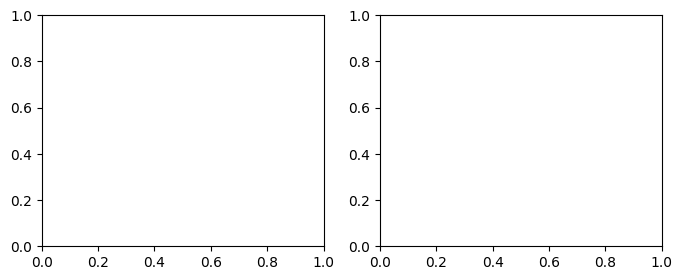

In [48]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
# write your code here

Both sexs on the same graph:

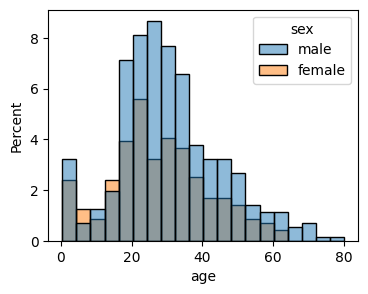

In [30]:
plt.figure(figsize=(4,3))
sns.histplot(data=titanic_df, x='age', stat='percent', hue='sex', multiple = 'layer' )
plt.show()

---
### <span style="color:blue"> Exercise:</span>
>
> try other options:
>
> `multiple{“layer”, “dodge”, “stack”, “fill”}`
>
> what is the default?
>
> create a histogram for `total_boosters_per_hundred` for our `grouped_df` dataframe


---

<a id='section4'></a>

<a id='section3'></a>
## 3. Scatterplots

Read the pickled file you saved on your PC at the end of unit 3 (last lesson):

In [13]:
strike_df = pd.read_pickle("pickled_strike")

If you haven't, then un-comment the below:

In [3]:
# url1 = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/aircraft%20wildlife%20strikes%202018-2020.csv'
# url2 = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/aircraft%20wildlife%20strikes%202021-2023.csv'
# strike_df_18_20 = pd.read_csv(url1)
# strike_df_21_23 = pd.read_csv(url2)
# strike_df = pd.concat([strike_df_18_20 ,strike_df_21_23]).reset_index(drop = True)
# strike_df['date'] = pd.to_datetime(strike_df['INCIDENT_DATE'],format='%d/%m/%Y')
# strike_df['month'] = pd.DatetimeIndex(strike_df['date']).month
# strike_df['year'] = pd.DatetimeIndex(strike_df['date']).year
# strike_df["people_impact"] = strike_df[['NR_INJURIES', 'NR_FATALITIES']].sum(axis=1)

All of these are numeric:

In [14]:
numeric_features = ['HEIGHT', 'SPEED', 'AC_MASS']
target_features = ['AircraftOutOfService','people_impact','struck_parts', 'damaged_parts']

All of these are categorical features:

In [15]:
categorical_features = ['WARNED','PHASE_OF_FLIGHT','SKY','TIME_OF_DAY']

#### Lets look at some of the numeric features:

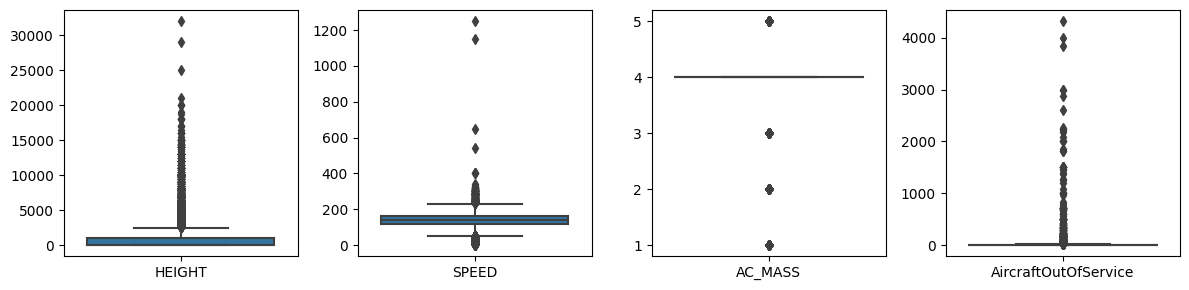

In [51]:
fig, axes = plt.subplots(figsize=(12, 3), ncols=4)
sns.boxplot(data=strike_df[['HEIGHT']], ax = axes[0])
sns.boxplot(data=strike_df[['SPEED']], ax = axes[1])
sns.boxplot(data=strike_df[['AC_MASS']], ax = axes[2])
sns.boxplot(data=strike_df[['AircraftOutOfService']], ax = axes[3])
plt.tight_layout()
plt.show()

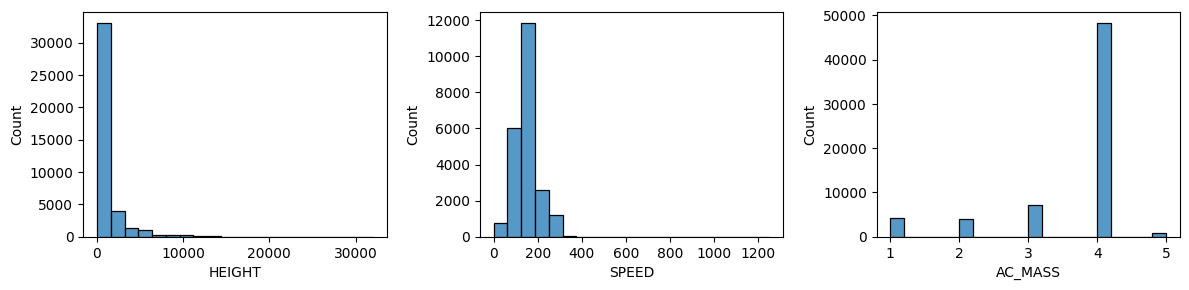

In [124]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))
for i, feature in enumerate(numeric_features):
    sns.histplot(data=strike_df[feature], ax=axs[i], bins=20)
   
plt.tight_layout()
plt.show()

In [9]:
all_features = target_features + numeric_features + categorical_features 
#all_features

In [16]:
strike_df_dum = pd.get_dummies(strike_df[all_features])
strike_df_dum.columns

Index(['AircraftOutOfService', 'people_impact', 'struck_parts',
       'damaged_parts', 'HEIGHT', 'SPEED', 'AC_MASS', 'WARNED_No',
       'WARNED_Unknown', 'WARNED_Yes', 'PHASE_OF_FLIGHT_Approach',
       'PHASE_OF_FLIGHT_Arrival', 'PHASE_OF_FLIGHT_Climb',
       'PHASE_OF_FLIGHT_Departure', 'PHASE_OF_FLIGHT_Descent',
       'PHASE_OF_FLIGHT_En Route', 'PHASE_OF_FLIGHT_Landing Roll',
       'PHASE_OF_FLIGHT_Local', 'PHASE_OF_FLIGHT_Parked',
       'PHASE_OF_FLIGHT_Take-off Run', 'PHASE_OF_FLIGHT_Taxi',
       'PHASE_OF_FLIGHT_Unknown', 'SKY_No Cloud', 'SKY_Overcast',
       'SKY_Some Cloud', 'TIME_OF_DAY_Dawn', 'TIME_OF_DAY_Day',
       'TIME_OF_DAY_Dusk', 'TIME_OF_DAY_Night'],
      dtype='object')

In [125]:
correlation_matrix = strike_df_dum.corr(numeric_only = False, method = 'spearman' ).round(2)
subset_correlation_matrix = correlation_matrix[target_features].transpose()
subset_correlation_matrix

,AircraftOutOfService,people_impact,struck_parts,damaged_parts,HEIGHT,SPEED,AC_MASS,WARNED_No,WARNED_Unknown,WARNED_Yes,...,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Taxi,PHASE_OF_FLIGHT_Unknown,SKY_No Cloud,SKY_Overcast,SKY_Some Cloud,TIME_OF_DAY_Dawn,TIME_OF_DAY_Day,TIME_OF_DAY_Dusk,TIME_OF_DAY_Night
AircraftOutOfService,1.00,0.07,0.12,0.61,0.07,-0.06,-0.20,0.02,-0.05,0.04,...,-0.00,-0.02,-0.01,-0.04,0.02,0.02,-0.01,-0.02,0.04,0.02
people_impact,0.07,1.00,0.01,0.10,0.02,-0.03,-0.05,0.01,-0.01,-0.01,...,-0.00,-0.00,-0.00,0.01,-0.00,0.00,0.00,0.01,0.00,0.01
struck_parts,0.12,0.01,1.00,0.18,0.10,-0.04,-0.08,0.28,-0.43,0.27,...,0.18,0.02,0.00,0.36,0.18,0.28,0.09,0.42,0.11,0.30
damaged_parts,0.61,0.10,0.18,1.00,0.14,-0.04,-0.16,0.11,-0.11,0.05,...,0.00,-0.00,-0.00,0.09,0.02,0.06,0.02,0.08,0.03,0.06


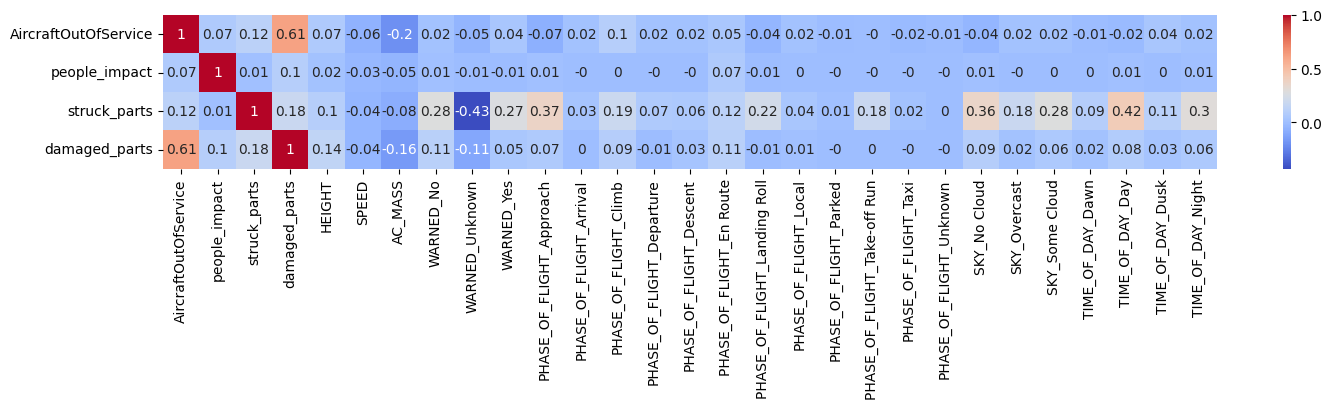

In [126]:
plt.figure(figsize=(17,2))
sns.heatmap(data=subset_correlation_matrix,cmap='coolwarm', annot=True, xticklabels=strike_df_dum.columns.tolist(), yticklabels=target_features)
plt.show()

<div>
<img src="https://raw.githubusercontent.com/nlihin/data-analytics/main/images/heatmap.png" width="900"/>
</div>

### Which is clearer? Scatterplot or Stripplot?

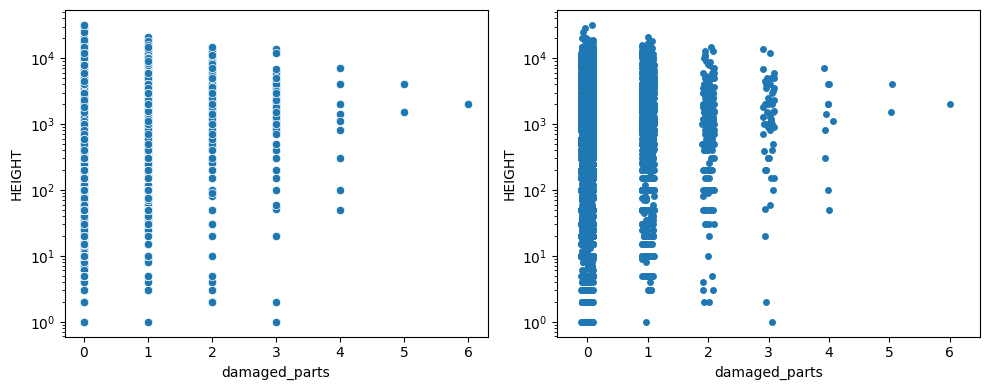

In [109]:
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)

sns.scatterplot(data = strike_df, y = 'HEIGHT', x = 'damaged_parts', ax = axes[0])
axes[0].set_yscale('log')

sns.stripplot(data = strike_df, y = 'HEIGHT', x = 'damaged_parts', ax = axes[1])
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

### Which plot is better?

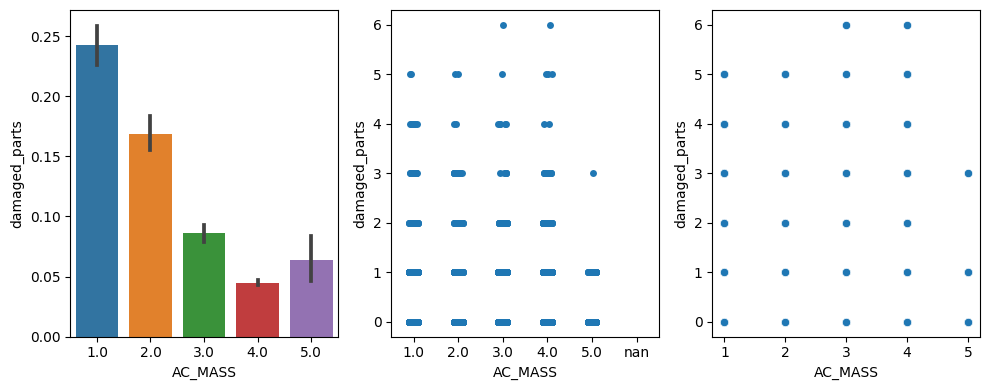

In [111]:
fig, axes = plt.subplots(figsize=(10, 4), ncols=3)

sns.barplot(data = strike_df, x = 'AC_MASS', y = 'damaged_parts', ax = axes[0])
sns.stripplot(data = strike_df, x = 'AC_MASS', y = 'damaged_parts', ax = axes[1])
sns.scatterplot(data = strike_df, x = 'AC_MASS', y = 'damaged_parts', ax = axes[2])

plt.tight_layout()
plt.show()

### Which plot is better?

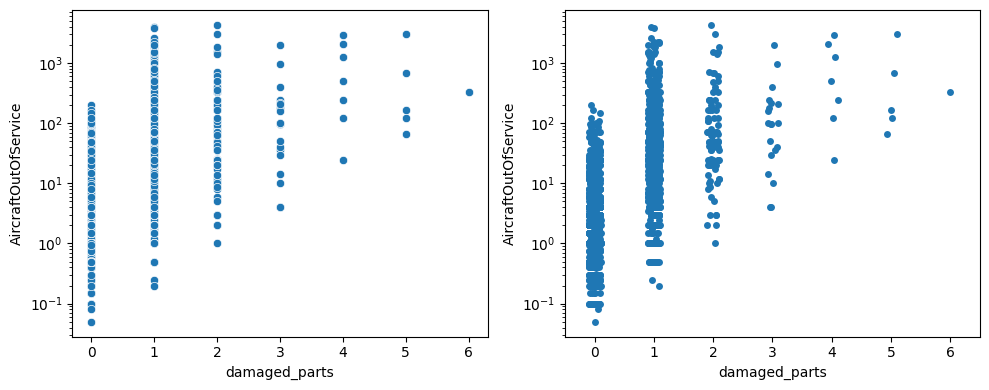

In [107]:
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)

sns.scatterplot(strike_df, y = "AircraftOutOfService", x="damaged_parts", ax = axes[0])
axes[0].set_yscale('log')

sns.stripplot(strike_df, y = "AircraftOutOfService", x="damaged_parts", ax = axes[1])
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

Create an order

In [132]:
damage_counts = strike_df.groupby('PHASE_OF_FLIGHT')['damaged_parts'].sum().sort_values(ascending=False)
damage_order = damage_counts.index

struck_counts = strike_df.groupby('PHASE_OF_FLIGHT')['struck_parts'].sum().sort_values(ascending=False)
struck_order = struck_counts.index

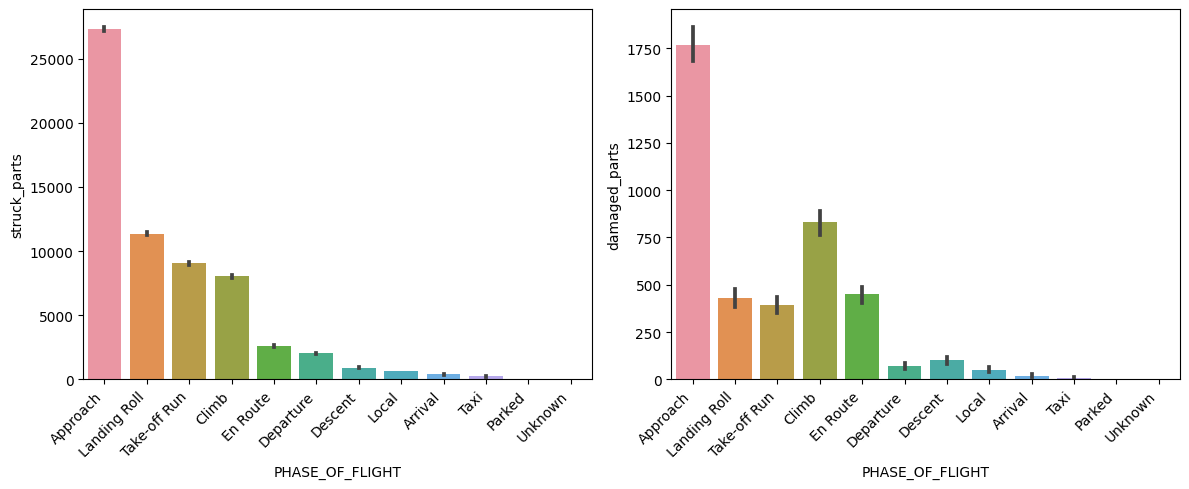

In [137]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

sns.barplot(data = strike_df, y = 'struck_parts', x = 'PHASE_OF_FLIGHT', ax = axes[0], order = struck_order, estimator = sum)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(data = strike_df, y = 'damaged_parts', x = 'PHASE_OF_FLIGHT', ax = axes[1], order = struck_order, estimator = sum)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

<a id='section4'></a>
## 4. Same stats, different graphs

In [31]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/DatasaurusDozen.tsv'

In [32]:
df = pd.read_csv(url, sep='\t')

In [ ]:
df.head(15)

Dataset names:

In [ ]:
df['dataset'].unique()

Dataset statistics

In [ ]:
df.groupby('dataset').agg(['count', 'mean', 'std'])

What can you say about the mean, std, and number of points in each dataset?

---
### <span style="color:blue"> Exercise:</span>
>
> Create 3 boxplot figures. For : `dataset == 'slant_down'` `dataset == 'star'` `dataset == 'circle'`

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

# write your code here

Lets display the histograms, but do it in a better way, using FacetGrid

FacetGrid is designed to split your data in several categories and plot the same relationship with the same plotting function across all categories for easy comparison

In [ ]:
g = sns.FacetGrid(df, col="dataset", hue="dataset", col_wrap=4, height = 2)
g.map(sns.histplot, 'x')
plt.show()

The same, but with scatterplots instead of histplots

In [ ]:
g = sns.FacetGrid(df, col="dataset", hue="dataset", col_wrap=4, height =2)
g.map(sns.scatterplot, "x", "y")
plt.show()

---
>### Functions covered in this unit:
>
> `scatterplot` - (x,y) points on the graphs
>
> `lineplot` - simple lineplot
>
> `plt.figure(fixsize(m,n))` - set the size of the graph\figure to (m,n)
>
> `boxplot` - create a boxplot
>
> `reset_index` - reset index to a numerical index beginning at 0
>
> `sort_values()` - sorts values 
>
> `histplot` - create a histogram
>
> `std()` - standard deviation
>

---